# 
# Disease detection from gene expression data using machine learning

Research from 1999 showed that diseases such as cancer can be classified from gene expression data. Approaches based on that research are still used today. It is necessary to download the data from the mentioned research (Golub et al. 1999). 

The dataset will be predicted using following algorithms: 
- Logistic regression
- Support vector machine 
- K-Means
- Artificial neural network

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

In [2]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#import tensorflow as tf
#from tensorflow import keras

In [3]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
#from sklearn.datasets import make_classification

# 
Importing resources and forming datasets

In [4]:
dataset1 = pd.read_csv("actual.csv")
dataset2 = pd.read_csv("data_set_ALL_AML_train.csv")
dataset3 = pd.read_csv("data_set_ALL_AML_independent.csv")

novi = dataset1
novi = novi.drop('patient', axis=1)

proba2 = dataset2.drop([col for col in dataset2.columns if "call" in col], axis=1)
proba2 = proba2.drop(['Gene Description','Gene Accession Number'], axis=1)

proba3 = dataset3.drop([col for col in dataset3.columns if "call" in col], axis=1)
proba3 = proba3.drop(['Gene Description','Gene Accession Number'], axis=1)
x_train = proba2.T
x_test = proba3.T.sort_index()

y = novi[0:38]
y2 = novi[38:]
y_train = np.copy(y)
y_train = np.ravel(y_train)
y_test = np.copy(y2)
y_test = np.ravel(y_test)

In [5]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

x_train_lr = np.copy(x_train)
y_train_lr = np.copy(y_train)

x_test_lr = np.copy(x_test)
y_test_lr = np.copy(y_test)

#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

x_train_svm = np.copy(x_train)
y_train_svm = np.copy(y_train)

x_test_svm = np.copy(x_test)
y_test_svm = np.copy(y_test)

#PRINCIPAL COMPONENT ANALYSIS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

x_train_pca = np.copy(x_train)
y_train_pca = np.copy(y_train)

x_test_pca = np.copy(x_test)
y_test_pca = np.copy(y_test)

#K-MEANS
from sklearn.cluster import KMeans

x_train_km = np.copy(x_train)
y_train_km = np.copy(y_train)

x_test_km = np.copy(x_test)
y_test_km = np.copy(y_test)

#NEURAL NETWORK
import tensorflow as tf
from tensorflow import keras

x_train_neural = np.copy(x_train)
y_train_neural = np.copy(y)
y_train_neural[y_train_neural== 'ALL'] = 0
y_train_neural[y_train_neural== 'AML'] = 1
y_train_neural = y_train_neural.astype('float')

x_test_neural = np.copy(x_test)
y_test_neural = np.copy(y2)
y_test_neural[y_test_neural== 'ALL'] = 0
y_test_neural[y_test_neural== 'AML'] = 1
y_test_neural = y_test_neural.astype('float')


# 
# LOGISTIC REGRESSION (LOGISTIČKA REGRESIJA)

In [6]:
LogisticRegression = LogisticRegression()

In [7]:
LogisticRegression.fit(x_train_lr, y_train_lr)

LogisticRegression()

In [8]:
train_pred_lr = LogisticRegression.predict(x_train_lr) #print(train_pred_lr == y_train_lr)
print("Confusion matrix for train set")
print(confusion_matrix(train_pred_lr, y_train_lr))

print()
print()

test_pred_lr = LogisticRegression.predict(x_test_lr) #print((test_pred_lr == y_test_lr))
print("Confusion matrix for test set")
print(confusion_matrix(test_pred_lr, y_test_lr))

print("\nAccuracy on test set\n", LogisticRegression.score(x_test_lr, y_test_lr))

Confusion matrix for train set
[[27  0]
 [ 0 11]]


Confusion matrix for test set
[[19  0]
 [ 1 14]]

Accuracy on test set
 0.9705882352941176


# 
# SUPPORT VECTOR MACHINE (STROJ POTPORNIH VEKTORA)


In [9]:
SVMachine = SVC(kernel = 'linear', C = 1)

In [10]:
SVMachine = SVC()

In [11]:
SVMachine = SVC(kernel = 'linear')
SVMachine.fit(x_train_svm, y_train_svm)

SVC(kernel='linear')

In [12]:
train_pred_svm = SVMachine.predict(x_train_svm)#print(train_pred_svm == y_train_svm)
print("Confusion matrix for train set")
print(confusion_matrix(train_pred_svm, y_train_svm))

print()
print()

test_pred_svm = SVMachine.predict(x_test_svm) #print((test_pred_svm == y_test_svm)[8])
print("Confusion matrix for test set")
print(confusion_matrix(test_pred_svm, y_test_svm))

print("\nAccuracy on test set\n", SVMachine.score(x_test_svm, y_test_svm))

Confusion matrix for train set
[[27  0]
 [ 0 11]]


Confusion matrix for test set
[[19  0]
 [ 1 14]]

Accuracy on test set
 0.9705882352941176


# 
# Prikaz uzoraka u dvodimenzionalnom formatu PCA algoritmom

In [13]:
x_train_all_pca = np.copy(x_train_pca[0:27])
y_train_all_pca = np.copy(y_train_pca[0:27])

x_train_aml_pca = np.copy(x_train_pca[27:38])
y_train_aml_pca = np.copy(y_train_pca[27:38])

x_test_all_pca = np.concatenate((np.asmatrix(np.copy(x_test_pca[0:11])),
                                np.asmatrix(np.copy(x_test_pca[16:18])),
                                np.asmatrix(np.copy(x_test_pca[20:21])),
                                np.asmatrix(np.copy(x_test_pca[28:34]))
                                ), axis = 0)


y_test_all_pca = np.concatenate((np.asmatrix(np.copy(y_test_pca[0:11])).T,
                                np.asmatrix(np.copy(y_test_pca[16:18])).T,
                                np.asmatrix(np.copy(y_test_pca[20:21])).T,
                                np.asmatrix(np.copy(y_test_pca[28:34])).T
                                ), axis = 0)

x_test_aml_pca = np.concatenate((np.asmatrix(np.copy(x_test_pca[11:16])),
                                np.asmatrix(np.copy(x_test_pca[18:20])),
                                np.asmatrix(np.copy(x_test_pca[21:28])),
                                ), axis = 0)

y_test_aml_pca = np.concatenate((np.asmatrix(np.copy(y_test_pca[11:16])).T,
                                np.asmatrix(np.copy(y_test_pca[18:20])).T,
                                np.asmatrix(np.copy(y_test_pca[21:28])).T,
                                ), axis = 0)

In [14]:
pca = PCA(n_components=3)

scaler = StandardScaler()
scaler.fit(x_train_all_pca)
scaled_data = scaler.transform(x_train_all_pca)
pca.fit(scaled_data)
x_pca_1 = pca.transform(scaled_data)

scaler = StandardScaler()
scaler.fit(x_train_aml_pca)
scaled_data= scaler.transform(x_train_aml_pca)
pca.fit(scaled_data)
x_pca_2 = pca.transform(scaled_data)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
pca = PCA(n_components=3)

scaler = StandardScaler()
scaler.fit(x_test_all_pca)
scaled_data = scaler.transform(x_test_all_pca)
pca.fit(scaled_data)
x_pca_3 = pca.transform(scaled_data)

scaler = StandardScaler()
scaler.fit(x_test_aml_pca)
scaled_data= scaler.transform(x_test_aml_pca)
pca.fit(scaled_data)
x_pca_4 = pca.transform(scaled_data)

Text(0.5, 1.0, 'Test set')

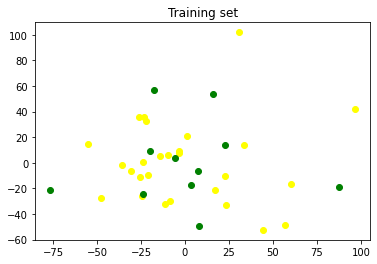

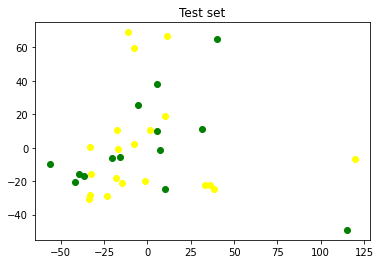

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca_1[:,0], x_pca_1[:,1], c='yellow' )
plt.scatter(x_pca_2[:,0], x_pca_2[:,1], c='green'  )
plt.title("Training set")

#plt.savefig("Prikaz_uzoraka_2D_train")

plt.figure(figsize=(6,4))
plt.scatter(x_pca_3[:,0], x_pca_3[:,1], c='yellow' )
plt.scatter(x_pca_4[:,0], x_pca_4[:,1], c='green'  )
plt.title("Test set")

#plt.savefig("Prikaz_uzoraka_2D_test")

# 
# K-Means (K-srednje vrijednosti)

In [18]:
Kmachine = KMeans(n_clusters = 2)
Kmachine_tts = KMeans(n_clusters = 2)
#parametar k_means - probati init staviti na random, n_init mozda 20 na randomu

In [19]:
Kmachine.fit(x_train_km)

KMeans(n_clusters=2)

In [20]:
train_pred_km = Kmachine.predict(x_train_km)
train_pred_km = train_pred_km.astype('O')#print(train_pred_km)

if (np.count_nonzero(train_pred_km == 0) > np.count_nonzero(train_pred_km == 1)):
    train_pred_km[train_pred_km==0] = "ALL"
    train_pred_km[train_pred_km==1] = "AML"
else:
    train_pred_km[train_pred_km==0] = "AML"
    train_pred_km[train_pred_km==1] = "ALL"
#print(train_pred_km == y_train_km)
print("Confusion matrix for train set")
print(confusion_matrix(train_pred_km, y_train_km))

print()
print()

test_pred_km = Kmachine.predict(x_test_km) 
test_pred_km = test_pred_km.astype('O') 
if (np.count_nonzero(test_pred_km == 0) > np.count_nonzero(test_pred_km == 1)):
    test_pred_km[test_pred_km==0] = "ALL"
    test_pred_km[test_pred_km==1] = "AML"
else:
    test_pred_km[test_pred_km==0] = "AML"
    test_pred_km[test_pred_km==1] = "ALL"
#print((test_pred_km == y_test_km)[8])
print("Confusion matrix for test set")
print(confusion_matrix(test_pred_km, y_test_km))

tocni = np.count_nonzero(test_pred_km == y_test_km)
preciznost = tocni / test_pred_km.size
print("\nAccuracy on test set\n", preciznost)

Confusion matrix for train set
[[27  4]
 [ 0  7]]


Confusion matrix for test set
[[20  8]
 [ 0  6]]

Accuracy on test set
 0.7647058823529411


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_big = np.concatenate((x_train, x_test), axis=0)
y_big = np.concatenate((y_train, y_test), axis=0)

In [23]:
for i in range(5):
    kalk = 35+(i*7)
    x_train_tts, x_test_tts, y_train_tts, y_test_tts = train_test_split(x_big, y_big, train_size = kalk, shuffle= False)
    Kmachine_tts.fit(x_train_tts)
    print("Training set length =", kalk, "/ 72")
    print()
    train_pred_tts = Kmachine_tts.predict(x_train_tts)
    train_pred_tts = train_pred_tts.astype('O')
    
    if (np.count_nonzero(train_pred_tts == 0) > np.count_nonzero(train_pred_tts == 1)):
        train_pred_tts[train_pred_tts==0] = "ALL"
        train_pred_tts[train_pred_tts==1] = "AML"
    else:
        train_pred_tts[train_pred_tts==0] = "AML"
        train_pred_tts[train_pred_tts==1] = "ALL"
    #train_pred_tts
    print("Comparing predicted values and labels for those", kalk,"values")
    print(y_train_tts == train_pred_tts)
    print(confusion_matrix(train_pred_tts, y_train_tts))
    print()
    
    test_pred_tts = Kmachine_tts.predict(x_test_tts)
    test_pred_tts = test_pred_tts.astype('O')
    if (np.count_nonzero(test_pred_tts == 0) > np.count_nonzero(test_pred_tts == 1)):
        test_pred_tts[test_pred_tts==0] = "ALL"
        test_pred_tts[test_pred_tts==1] = "AML"
    else:
        test_pred_tts[test_pred_tts==0] = "AML"
        test_pred_tts[test_pred_tts==1] = "ALL"
    #K_pred_tts
    print("Comparing predicted values and labels for the rest", 72-kalk,"values")
    print(test_pred_tts == y_test_tts)
    print(confusion_matrix(test_pred_tts, y_test_tts))
    print()
    print()
    
    #init za k.means

Training set length = 35 / 72

Comparing predicted values and labels for those 35 values
[ True  True False  True  True False  True  True False False False  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False False False False False False False False]
[[21  8]
 [ 6  0]]

Comparing predicted values and labels for the rest 37 values
[False False False  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True  True False False  True
 False False False False False False False  True  True  True  True  True
  True]
[[20 17]
 [ 0  0]]


Training set length = 42 / 72

Comparing predicted values and labels for those 42 values
[False  True  True False  True  True False False  True  True  True False
 False  True  True False  True False False  True False False False  True
 False False False False  True False False False False False False False
 False False False False False False]
[[12 10]
 [19  1]]

Co

# 
# Neuronske mreže

In [24]:
layer_one = 347
layer_two = 53

In [25]:
NNeural = tf.keras.models.Sequential([
    tf.keras.layers.Dense(layer_one, activation = 'relu'),
    tf.keras.layers.Dense(layer_two, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
NNeural.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Epoch 1/15
2/2 [==============================] - 1s 177ms/step - loss: 9480.4092 - accuracy: 0.5789 - val_loss: 5270.4980 - val_accuracy: 0.4118
Epoch 2/15
2/2 [==============================] - 0s 51ms/step - loss: 5145.1655 - accuracy: 0.4474 - val_loss: 4543.9810 - val_accuracy: 0.5882
Epoch 3/15
2/2 [==============================] - 0s 53ms/step - loss: 2542.2974 - accuracy: 0.7105 - val_loss: 4972.2051 - val_accuracy: 0.5882
Epoch 4/15
2/2 [==============================] - 0s 59ms/step - loss: 3439.1260 - accuracy: 0.7105 - val_loss: 213.4712 - val_accuracy: 0.6765
Epoch 5/15
2/2 [==============================] - 0s 53ms/step - loss: 174.1798 - accuracy: 0.8421 - val_loss: 152.8942 - val_accuracy: 0.7941
Epoch 6/15
2/2 [==============================] - 0s 51ms/step - loss: 66.1516 - accuracy: 0.9211 - val_loss: 213.4649 - val_accuracy: 0.7647
Epoch 7/15
2/2 [==============================] - 0s 55ms/step - loss: 115.2047 - accuracy: 0.8421 - val_loss: 4516.9155 - val_accuracy

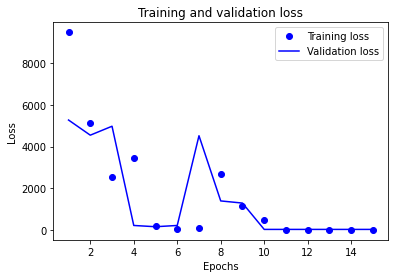

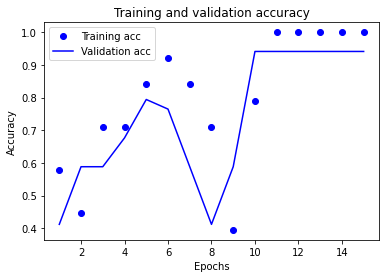

In [26]:
history = NNeural.fit(x_train_neural,
 y_train_neural,
 epochs=15,
 validation_data=(x_test_neural, y_test_neural))

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", 
         label="Training loss")
plt.plot(epochs, val_loss_values, "b", 
         label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", 
         label="Training acc")
plt.plot(epochs, val_acc, "b", 
         label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
NNeural = tf.keras.models.Sequential([
    tf.keras.layers.Dense(layer_one, activation = 'relu'),
    tf.keras.layers.Dense(layer_two, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

NNeural.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

NNeural.fit(x_train_neural,
 y_train_neural,
 epochs=9)


Epoch 1/9
2/2 [==============================] - 1s 50ms/step - loss: 1968.6349 - accuracy: 0.6053
Epoch 2/9
2/2 [==============================] - 0s 47ms/step - loss: 8254.5117 - accuracy: 0.3421
Epoch 3/9
2/2 [==============================] - 0s 41ms/step - loss: 4139.0859 - accuracy: 0.7368
Epoch 4/9
2/2 [==============================] - 0s 37ms/step - loss: 1198.2301 - accuracy: 0.7368
Epoch 5/9
2/2 [==============================] - 0s 33ms/step - loss: 3686.4976 - accuracy: 0.7632
Epoch 6/9
2/2 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/9
2/2 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/9
2/2 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/9
2/2 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000


2/2 [==============================] - 0s 4ms/step

Confusion matrix for train set
 [[27  0]
 [ 0 11]]


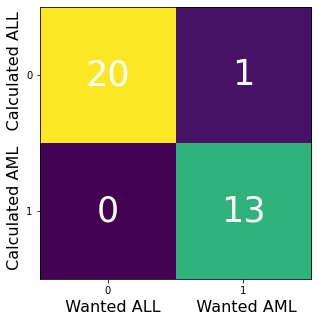


Accuracy on test set
 0.9705882352941176


In [28]:
train_pred_neural = NNeural.predict(x_train_neural)
test_pred_neural = NNeural.predict(x_test_neural)
print()
print("Confusion matrix for train set\n",
      confusion_matrix(train_pred_neural, y_train_neural))


test_pred_neural = test_pred_neural.astype('int')
cm = confusion_matrix(test_pred_neural, y_test_neural)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_ylabel(' Calculated AML   Calculated ALL', fontsize=16, color='black')
ax.set_xlabel('  Wanted ALL       Wanted AML', fontsize=16, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', fontsize=35, va='center', color='white')
plt.show() 
#plt.savefig("Neural Test")

tocni = np.count_nonzero(test_pred_neural == y_test_neural)
preciznost = tocni / test_pred_neural.size
print("\nAccuracy on test set\n", preciznost)
#save fig plt.savefig